In [38]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('..')

In [24]:
# custom visualization module
from modules.tools import viz

In [13]:
meta_path = "../data/meta/"
features_path = "../results/predictions-arc/"

Read general metainfo. It contains image coordinates and GFP taf info.

In [16]:
metainfo = pd.read_csv(f"{meta_path}/metainfo.csv", index_col=0, dtype={'URL': object})
metainfo.head()

,Row,Column,Field,URL,R-C,GFP,natMX4,pairs
0,1,1,1,001001001,1-1,KIN1,NaN,KIN1-KIN2
1,1,1,2,001001002,1-1,KIN1,NaN,KIN1-KIN2
2,1,1,3,001001003,1-1,KIN1,NaN,KIN1-KIN2
3,1,1,4,001001004,1-1,KIN1,NaN,KIN1-KIN2
4,1,2,1,001002001,1-2,KIN2,NaN,KIN1-KIN2


Select a paralog pair and read metainfo about cells belonging to this pair.

In [19]:
pair = "KIN1-KIN2"

metainfo_pair = pd.read_csv(f"{meta_path}/metainfo_replicate*_{pair}.csv", index_col=0)
metainfo_pair.head()

,URL,replicate,cell_id,file,Row,Column,Field,R-C,GFP,natMX4,pairs,label,class,abundance
0,1001001,replicate1,0000.npy,../data/frames/replicate1/001001001/0000.npy,1,1,1,1-1,KIN1,NaN,KIN1-KIN2,KIN1-GFP KIN2-WT,0,12.518066
1,1002001,replicate1,0000.npy,../data/frames/replicate1/001002001/0000.npy,1,2,1,1-2,KIN2,NaN,KIN1-KIN2,KIN2-GFP KIN1-WT,1,15.993164
2,1002001,replicate1,0001.npy,../data/frames/replicate1/001002001/0001.npy,1,2,1,1-2,KIN2,NaN,KIN1-KIN2,KIN2-GFP KIN1-WT,1,17.327637
3,1002001,replicate1,0002.npy,../data/frames/replicate1/001002001/0002.npy,1,2,1,1-2,KIN2,NaN,KIN1-KIN2,KIN2-GFP KIN1-WT,1,15.775146
4,1002001,replicate1,0003.npy,../data/frames/replicate1/001002001/0003.npy,1,2,1,1-2,KIN2,NaN,KIN1-KIN2,KIN2-GFP KIN1-WT,1,15.205078


URL indicates `.flex` file from which a certain cell comes from. It is also encoded in the file path to a particular cell. E.g. `../data/frames/replicate1/001001001/0000.npy` was taken from `001001001.flex` source file.

Read cell features extracted by neural network.

In [30]:
features_pair = pd.read_csv(f"{features_path}/{pair}-features.csv", index_col=0).drop("label", axis=1)
features = features_pair.values
features_pair.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-1.010782,0.034629,-1.160369,-0.923997,-0.467788,-0.106931,0.173045,-0.763408,-1.266502,-0.109280,...,0.682161,0.252791,0.343772,1.242864,0.457380,-1.969752,-0.289140,-1.137230,0.856032,0.570150
1,0.084727,0.744146,0.675312,-2.022658,1.287805,0.124151,-0.503410,-0.980814,-0.078398,-0.471713,...,-0.160825,-0.635704,0.724026,1.465383,-0.885521,-2.873334,-0.737830,-0.537831,1.392655,0.715899
2,-0.675876,1.143195,0.291462,-1.715634,1.312540,-0.411515,0.119615,-1.461875,0.842258,-0.381638,...,-0.044948,-0.605570,1.702777,0.895668,0.025427,-1.863618,-1.016044,-1.083120,0.711842,0.754353
3,0.866898,0.670506,0.954975,-0.529756,0.743709,-0.191964,-0.839897,-1.776563,0.985366,-1.154261,...,-1.346105,-0.136619,1.020095,0.585796,-1.271499,-2.718887,-0.632774,-0.844863,1.242752,0.788869
4,1.177486,0.224787,0.432115,-0.911996,0.713374,0.124360,-1.105545,-0.584310,1.062830,-1.570332,...,-1.577690,-0.397125,0.228133,0.094098,-1.983236,-3.372827,0.358077,-0.731991,1.094098,0.967645


You can create a PCA plot with this function

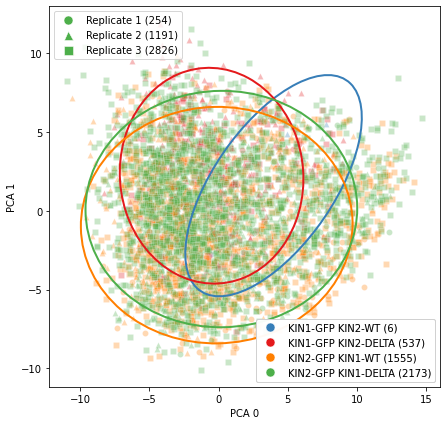

In [31]:
fig, ax = viz.plot_pca(
    features=features,
    metainfo=metainfo_pair,
    figsize=7,
    use_seaborn=False,
    scale=True,
    separate_replicates=True,
    replicate_legend_loc=2,
    label_legend_loc=4,
)

plt.show()

You can also create the same plot using `seaborn` instead of `matplotlib`, but it will lack confidence ellipses.

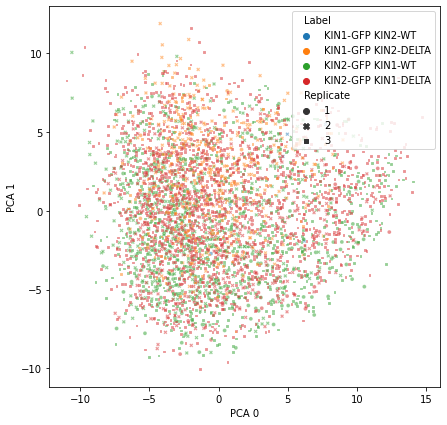

In [34]:
fig, ax = viz.plot_pca(
    features=features,
    metainfo=metainfo_pair,
    figsize=7,
    use_seaborn=True,
    scale=True,
    separate_replicates=True,
    replicate_legend_loc=2,
    label_legend_loc=4,
)

plt.show()

Taking a closer look at what happens inside, we first scale and PCA-transform NN features.

In [28]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [33]:
tfm = make_pipeline(StandardScaler(), PCA(n_components=2))
features_tfm = tfm.fit_transform(features)
features_tfm.shape

(4271, 2)

Now we put all the data we need in the dataframe. We can always recreate the PCA plot using this dataframe.

In [36]:
df = pd.DataFrame(
    {
        "x": features_tfm[:, 0],
        "y": features_tfm[:, 1],
        "Label": metainfo_pair.label,
        "Replicate": metainfo_pair.replicate.str.replace("replicate", ""),
    }
)

Finally, we create the plot.

In [46]:
from modules.tools.viz import get_confidence_ellipse, set_legend_marker_alpha

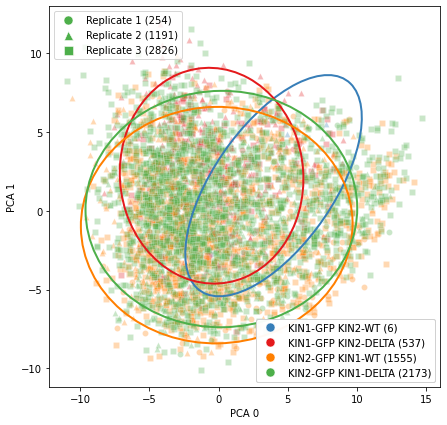

In [48]:
separate_replicates = True
replicate_legend_loc = 2
label_legend_loc = 4

colors = np.array(["#377eb8", "#e41a1c", "#ff7f00", "#4daf4a"])
shapes = ["o", "^", "s"]
label_order, label_count = np.unique(df.Label, return_counts=True)
label_order = label_order[[1, 0, 3, 2]]  # WT comes first
label_count = label_count[[1, 0, 3, 2]]  # WT comes first
replicate_order, replicate_count = np.unique(df.Replicate, return_counts=True)
fig, ax = plt.subplots(figsize=(7, 7))

points_label = []
for label, color in zip(label_order, colors):
    points_replicate_label = []
    for replicate, shape in zip(replicate_order, shapes):
        if separate_replicates:
            sub_df = df.loc[
                (df.Label == label) & (df.Replicate == replicate), :
            ]
        else:
            sub_df = df.loc[df.Label == label, :]
        # Scatter plot
        (points,) = ax.plot(
            sub_df.x,
            sub_df.y,
            shape,
            markersize=6,
            label=label,
            alpha=0.3,
            color=color,
            markeredgecolor="white",
            markeredgewidth=0.5,
        )
        points_replicate_label.append(points)
        if not separate_replicates:
            break
    points_label.append(points_replicate_label.copy())

# Confidence ellipse (for all replicates)
for label, color in zip(label_order, colors):
    ellipse, within_ellipse = get_confidence_ellipse(
        df.loc[df.Label == label, "x"],
        df.loc[df.Label == label, "y"],
        color=color,
        lw=2,
    )
    ax.add_artist(ellipse)

# Legends
# Replicates and shapes
if separate_replicates:
    legend_replicate = ax.legend(
        points_label[-1],
        [
            f"Replicate {r} ({c})"
            for r, c in zip(replicate_order, replicate_count)
        ],
        loc=replicate_legend_loc,
        markerscale=1.5,
        framealpha=0.8,
        fancybox=True,
        frameon=True,
    )
    legend_replicate.set_zorder(6)
    set_legend_marker_alpha(legend_replicate, 1)
    ax.add_artist(legend_replicate)

# Labels and colors
legend_label = ax.legend(
    [lab[0] for lab in points_label if len(lab) != 0],
    [f"{r} ({c})" for r, c in zip(label_order, label_count)],
    loc=label_legend_loc,
    markerscale=1.5,
    framealpha=0.8,
    fancybox=True,
    frameon=True,
)
legend_label.set_zorder(6)
set_legend_marker_alpha(legend_label, 1)
ax.add_artist(legend_label)

ax.set_xlabel("PCA 0")
ax.set_ylabel("PCA 1")

plt.show()